In [55]:
import pandas as pd
papers = pd.read_csv('book2.csv',encoding='ISO-8859-1')

In [56]:
papers.head()

,ID,Date,Aquirer,Aquired,Heading,Text
0,1,05-Mar-19,Amazon,Harvard hospital,Amazon uses AI to take care of Harvard hospita...,AMAZON has moved to strengthen its ties with A...
1,2,9 January 2019,AppFolio,Dynasty Marketplace,AppFolio Acquires Advanced Artificial Intellig...,"AppFolio, Inc. (NASDAQ: APPF), a leading provi..."
2,3,08-Feb-19,avalara,Indix,Avalara buys AI startup Indix,Tax automation solutions provider Avalara has ...
3,4,05-Jun-18,Black Knight,HeavyWater,Black Knight seeks AI might with HeavyWater deal,"Black Knight has acquired HeavyWater, a develo..."
4,5,27-Feb-19,blackberry,Cylance,BlackBerry buys AI cybersecurity firm Cylance ...,BlackBerry has completed its $1.4 billion acqu...


In [57]:
# Remove the columns
papers = papers.drop(columns=['Date','Aquirer','Aquired','Heading'], axis=1)
# sample only 10 papers - for demonstration purposes
papers = papers.sample(25)
# Print out the first rows of papers
papers.head()

,ID,Text
17,18,US-based Recall Studios (OTC: BTOP) has close...
23,24,"The latest acquisition is Machine Box Inc., a ..."
3,4,"Black Knight has acquired HeavyWater, a develo..."
14,15,Hewlett Packard Enterprise (NYSE: HPE) announc...
1,2,"AppFolio, Inc. (NASDAQ: APPF), a leading provi..."


In [58]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['Text'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

<>:4: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-58-0b110d95ec82>:4: DeprecationWarning: invalid escape sequence \.
  papers['paper_text_processed'] = papers['Text'].map(lambda x: re.sub('[,\.!?]', '', x))


17     us-based recall studios (otc: btop) has close...
23    the latest acquisition is machine box inc., a ...
3     black knight has acquired heavywater, a develo...
14    hewlett packard enterprise (nyse: hpe) announc...
1     appfolio, inc. (nasdaq: appf), a leading provi...
Name: paper_text_processed, dtype: object

In [59]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:2])

[['us', 'based', 'recall', 'studios', 'otc', 'btop', 'has', 'closed', 'the', 'acquisition', 'of', 'artificial', 'intelligence', 'technology', 'firm', 'evolution', 'ai', 'corp', 'the', 'company', 'said', 'evolution', 'ai', 'is', 'engaged', 'in', 'the', 'development', 'of', 'hyper', 'realistic', 'human', 'animation', 'technology', 'to', 'enable', 'intelligence', 'platforms', 'to', 'interact', 'with', 'consumers', 'in', 'relatable', 'human', 'form', 'the', 'acquisition', 'will', 'also', 'include', 'evolution', 'ai', 'corp', 'majority', 'stake', 'in', 'pulse', 'evolution', 'corp', 'otc', 'plfx', 'apioneer', 'in', 'the', 'development', 'of', 'hyper', 'realistic', 'digital', 'humans', 'for', 'live', 'shows', 'virtual', 'reality', 'augmented', 'reality', 'holographic', 'stereoscopic', 'web', 'mobile', 'interactive', 'and', 'artificial', 'intelligence', 'applications', 'under', 'the', 'terms', 'of', 'the', 'transaction', 'recall', 'studios', 'will', 'pay', 'usd', 'to', 'evolution', 'ai', 'corp

In [60]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [61]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','to','be','of','in','has'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [63]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:5])

[['base', 'studio', 'close', 'technology', 'firm', 'evolution', 'say', 'engage', 'development', 'hyper', 'realistic', 'human', 'animation', 'technology', 'enable', 'intelligence', 'platform', 'interact', 'consumer', 'relatable', 'human', 'form', 'acquisition', 'also', 'include', 'evolution', 'hyper', 'realistic', 'digital', 'human', 'live', 'show', 'virtual', 'reality', 'augment', 'reality', 'holographic', 'application', 'term', 'transaction', 'recall', 'studio', 'pay', 'usd', 'evolution', 'shareholder', 'form', 'newly', 'issue', 'common', 'stock', 'recall', 'studio', 'exchange', 'common', 'include', 'approximate', 'ownership', 'interest', 'price', 'base', 'initial', 'negotiate', 'valuation', 'usd', 'share', 'recall', 'adjustment', 'base', 'average', 'trading', 'price', 'recall', 'studiosshare', 'term', 'fully', 'outline', 'definitive', 'share', 'exchange', 'agreement', 'execute', 'thepartie', 'recall', 'studio', 'principal', 'strategy', 'focus', 'explosive', 'market', 'mixed', 'realit

In [64]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus)

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 5), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 2), (35, 4), (36, 2), (37, 1), (38, 3), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 3), (72, 5), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 5), (84, 1), (85, 3), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1)], [(0, 1), (1, 2), (7, 1), (12, 3), (15, 1), (21, 1), (38, 1), (45, 1), (47, 1), (58, 2), (61, 1), (75, 1), (77, 4), (79, 1), (81, 3), (88, 1), (94, 1), (95, 1), (

In [65]:
print(corpus[3])
print(id2word[12])
print(id2word[13])
print(id2word[14])

[(0, 1), (1, 1), (7, 5), (12, 1), (22, 2), (38, 1), (40, 1), (61, 2), (63, 1), (75, 2), (76, 1), (82, 1), (85, 2), (89, 1), (98, 2), (99, 1), (100, 2), (117, 1), (118, 4), (126, 1), (139, 1), (161, 1), (168, 1), (184, 1), (188, 1), (195, 2), (196, 1), (201, 1), (208, 3), (229, 2), (233, 1), (236, 1), (248, 2), (249, 1), (259, 1), (260, 1), (261, 1), (262, 1), (263, 1), (264, 1), (265, 1), (266, 1), (267, 1), (268, 1), (269, 1), (270, 1), (271, 1), (272, 1), (273, 1), (274, 1), (275, 1), (276, 1), (277, 1), (278, 8), (279, 1), (280, 1), (281, 1), (282, 1), (283, 1), (284, 2), (285, 1), (286, 2), (287, 1), (288, 1), (289, 1), (290, 1), (291, 1), (292, 1), (293, 1), (294, 1), (295, 4), (296, 1), (297, 1), (298, 1), (299, 1), (300, 1), (301, 1), (302, 1), (303, 1), (304, 1), (305, 1), (306, 1), (307, 1), (308, 1), (309, 1), (310, 1), (311, 1), (312, 1), (313, 1), (314, 1), (315, 1), (316, 1), (317, 3), (318, 2), (319, 1), (320, 2), (321, 1), (322, 1), (323, 1), (324, 1), (325, 1), (326, 1)

In [66]:
# supporting function
from gensim.models import CoherenceModel

def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [26]:

import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()



  0%|                                                                                          | 0/270 [00:00<?, ?it/s]

  0%|▎                                                                                 | 1/270 [00:09<42:01,  9.37s/it]

  1%|▌                                                                                 | 2/270 [00:18<41:25,  9.28s/it]

  1%|▉                                                                                 | 3/270 [00:27<40:51,  9.18s/it]

  1%|█▏                                                                                | 4/270 [00:36<40:27,  9.13s/it]

  2%|█▌                                                                                | 5/270 [00:45<40:07,  9.08s/it]

  2%|█▊                                                                                | 6/270 [00:54<39:58,  9.09s/it]

  3%|██▏                                                                               | 7/270 [01:03<39:39,  9.05s/it]

  3%|██▍                      

 47%|█████████████████████████████████████▉                                          | 128/270 [19:55<22:53,  9.67s/it]

 48%|██████████████████████████████████████▏                                         | 129/270 [20:04<22:50,  9.72s/it]

 48%|██████████████████████████████████████▌                                         | 130/270 [20:15<23:08,  9.92s/it]

 49%|██████████████████████████████████████▊                                         | 131/270 [20:25<23:02,  9.95s/it]

 49%|███████████████████████████████████████                                         | 132/270 [20:34<22:44,  9.89s/it]

 49%|███████████████████████████████████████▍                                        | 133/270 [20:44<22:22,  9.80s/it]

 50%|███████████████████████████████████████▋                                        | 134/270 [20:54<22:05,  9.75s/it]

 50%|████████████████████████████████████████                                        | 135/270 [21:03<21:51,  9.72s/it]

 50%|███████████████████████████

 95%|███████████████████████████████████████████████████████████████████████████▊    | 256/270 [46:09<02:11,  9.36s/it]

 95%|████████████████████████████████████████████████████████████████████████████▏   | 257/270 [46:18<02:01,  9.36s/it]

 96%|████████████████████████████████████████████████████████████████████████████▍   | 258/270 [46:28<01:51,  9.31s/it]

 96%|████████████████████████████████████████████████████████████████████████████▋   | 259/270 [46:37<01:42,  9.35s/it]

 96%|█████████████████████████████████████████████████████████████████████████████   | 260/270 [46:46<01:33,  9.33s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▎  | 261/270 [46:56<01:23,  9.32s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▋  | 262/270 [47:05<01:14,  9.33s/it]

 97%|█████████████████████████████████████████████████████████████████████████████▉  | 263/270 [47:14<01:05,  9.35s/it]

 98%|███████████████████████████

In [27]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 11
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results_extended.csv', index=False)
    pbar.close()



  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

  0%|▎                                                                                 | 1/300 [00:09<48:05,  9.65s/it]

  1%|▌                                                                                 | 2/300 [00:19<47:40,  9.60s/it]

  1%|▊                                                                                 | 3/300 [00:28<47:02,  9.50s/it]

  1%|█                                                                                 | 4/300 [00:37<46:51,  9.50s/it]

  2%|█▎                                                                                | 5/300 [00:47<46:24,  9.44s/it]

  2%|█▋                                                                                | 6/300 [00:56<46:20,  9.46s/it]

  2%|█▉                                                                                | 7/300 [01:06<46:09,  9.45s/it]

  3%|██▏                      

 43%|██████████████████████████████████▏                                             | 128/300 [22:33<31:33, 11.01s/it]

 43%|██████████████████████████████████▍                                             | 129/300 [22:44<30:36, 10.74s/it]

 43%|██████████████████████████████████▋                                             | 130/300 [22:54<30:13, 10.67s/it]

 44%|██████████████████████████████████▉                                             | 131/300 [23:04<29:07, 10.34s/it]

 44%|███████████████████████████████████▏                                            | 132/300 [23:14<28:42, 10.25s/it]

 44%|███████████████████████████████████▍                                            | 133/300 [23:24<28:47, 10.34s/it]

 45%|███████████████████████████████████▋                                            | 134/300 [23:35<29:07, 10.53s/it]

 45%|████████████████████████████████████                                            | 135/300 [23:45<28:40, 10.43s/it]

 45%|███████████████████████████

 85%|████████████████████████████████████████████████████████████████████▎           | 256/300 [44:35<07:40, 10.46s/it]

 86%|████████████████████████████████████████████████████████████████████▌           | 257/300 [44:45<07:27, 10.40s/it]

 86%|████████████████████████████████████████████████████████████████████▊           | 258/300 [44:55<07:12, 10.30s/it]

 86%|█████████████████████████████████████████████████████████████████████           | 259/300 [45:06<07:02, 10.31s/it]

 87%|█████████████████████████████████████████████████████████████████████▎          | 260/300 [45:16<06:54, 10.36s/it]

 87%|█████████████████████████████████████████████████████████████████████▌          | 261/300 [45:27<06:47, 10.45s/it]

 87%|█████████████████████████████████████████████████████████████████████▊          | 262/300 [45:37<06:36, 10.44s/it]

 88%|██████████████████████████████████████████████████████████████████████▏         | 263/300 [45:47<06:23, 10.36s/it]

 88%|███████████████████████████

In [67]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.61,
                                           eta=0.91)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.45470838403870684


In [68]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"customer" + 0.004*"experience" + 0.004*"company" + '
  '0.004*"acquisition" + 0.003*"year" + 0.003*"ai" + 0.003*"capability" + '
  '0.003*"system" + 0.003*"share" + 0.003*"call"'),
 (1,
  '0.003*"business" + 0.003*"move" + 0.003*"say" + 0.003*"model" + '
  '0.003*"company" + 0.002*"payment" + 0.002*"late" + 0.002*"deal" + '
  '0.002*"studio" + 0.002*"time"'),
 (2,
  '0.008*"technology" + 0.007*"base" + 0.007*"grapevine" + 0.006*"influencer" '
  '+ 0.006*"brand" + 0.005*"asset" + 0.005*"company" + 0.005*"platform" + '
  '0.005*"digital" + 0.005*"acquisition"'),
 (3,
  '0.001*"recall" + 0.001*"studio" + 0.001*"evolution" + 0.001*"human" + '
  '0.001*"intelligence" + 0.001*"common" + 0.001*"holographic" + 0.001*"form" '
  '+ 0.001*"hyper" + 0.001*"reality"'),
 (4,
  '0.001*"technology" + 0.001*"customer" + 0.001*"say" + 0.001*"company" + '
  '0.001*"base" + 0.001*"market" + 0.001*"solution" + 0.001*"acquisition" + '
  '0.001*"business" + 0.001*"help"'),
 (5,
  '0.006*"marke

In [1]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

NameError: name 'lda_model' is not defined

In [31]:
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')

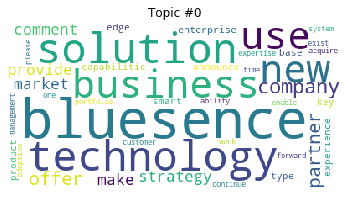

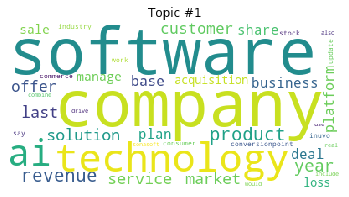

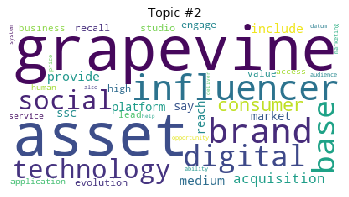

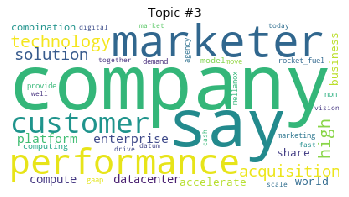

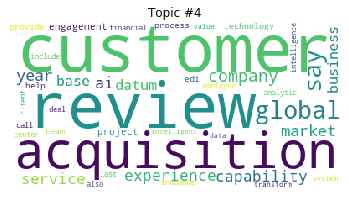

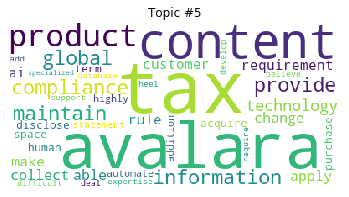

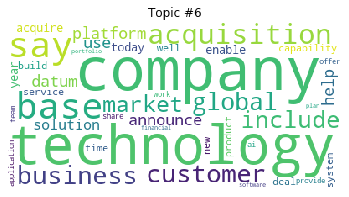

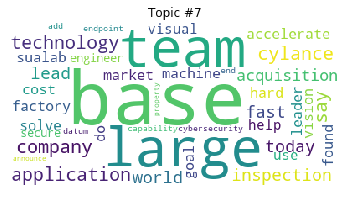

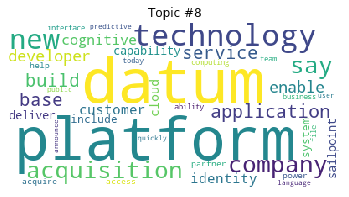

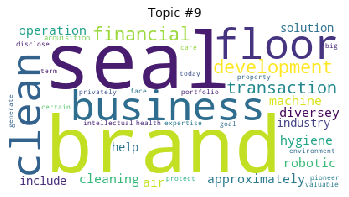

In [47]:
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
for t in range(lda_model.num_topics):
    plt.figure()
    #plt.imshow(WordCloud().fit_words(lda_model.show_topic(t, 200)))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, 40))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig("Topic#"+str(t), format='pdf')
    plt.show()

In [51]:
Topic_0 = []
Topic_1 = []
Topic_2 = []
Topic_3 = []
Topic_4 = []
Topic_5 = []
Topic_6 = []
Topic_7 = []
Topic_8 = []
Topic_9 = []
Doc_No = []
data_lemmatized_word = []
for i, row in enumerate(lda_model[corpus]):
    #row = sorted(row, key=lambda x:x[1], reverse=True)
    Topic_0.append(0);
    Topic_1.append(0);
    Topic_2.append(0);
    Topic_3.append(0);
    Topic_4.append(0);
    Topic_5.append(0);
    Topic_6.append(0);
    Topic_7.append(0);
    Topic_8.append(0);
    Topic_9.append(0);
    Doc_No.append(i);
    data_lemmatized_word.append(data_lemmatized[i])
    for k in range(len(row)):
        if(row[k][0]==0):
            Topic_0[i]=row[k][1];
        if(row[k][0]==1):
            Topic_1[i]=row[k][1];
        if(row[k][0]==2):
            Topic_2[i]=row[k][1];
        if(row[k][0]==3):
            Topic_3[i]=row[k][1];
        if(row[k][0]==4):
            Topic_4[i]=row[k][1];
        if(row[k][0]==5):
            Topic_5[i]=row[k][1];
        if(row[k][0]==6):
            Topic_6[i]=row[k][1];
        if(row[k][0]==7):
            Topic_7[i]=row[k][1];
        if(row[k][0]==8):
            Topic_8[i]=row[k][1];
        if(row[k][0]==9):
            Topic_9[i]=row[k][1];   
df = pd.DataFrame(list(zip(Doc_No, Topic_0, Topic_1, Topic_2, Topic_3, Topic_4, Topic_5, Topic_6, Topic_7, Topic_8, Topic_9,data_lemmatized_word)), 
               columns = ['Doc_No', 'Topic#0', 'Topic#1', 'Topic#2', 'Topic#3', 'Topic#4', 'Topic#5', 'Topic#6', 'Topic#7', 'Topic#8', 'Topic#9','Text'])
df.to_csv('Topic_Score_for_each_Document.csv')

In [70]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

lda_topics = lda_model.show_topics(num_words=30)

topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

for topic in lda_topics:
    print(topic)
    topics.append(preprocess_string(topic[1], filters))

print(topics)

(0, '0.009*"customer" + 0.004*"experience" + 0.004*"company" + 0.004*"acquisition" + 0.003*"year" + 0.003*"ai" + 0.003*"capability" + 0.003*"system" + 0.003*"share" + 0.003*"call" + 0.003*"engagement" + 0.003*"revenue" + 0.002*"intelligence" + 0.002*"team" + 0.002*"employee" + 0.002*"say" + 0.002*"intelligent" + 0.002*"market" + 0.002*"deal" + 0.002*"analytic" + 0.002*"transform" + 0.002*"stock" + 0.002*"center" + 0.002*"service" + 0.002*"route" + 0.002*"veritone" + 0.002*"last" + 0.002*"business" + 0.002*"loss" + 0.002*"base"')
(1, '0.003*"business" + 0.003*"move" + 0.003*"say" + 0.003*"model" + 0.003*"company" + 0.002*"payment" + 0.002*"late" + 0.002*"deal" + 0.002*"studio" + 0.002*"time" + 0.002*"startup" + 0.002*"potential" + 0.002*"small" + 0.002*"acquisition" + 0.002*"new" + 0.002*"sport" + 0.002*"margin" + 0.002*"away" + 0.002*"tweet" + 0.002*"utility" + 0.002*"bitcoin" + 0.002*"vehicle" + 0.002*"online" + 0.002*"would" + 0.001*"digital" + 0.001*"provide" + 0.001*"well" + 0.001*

In [78]:
Topic0 = topics[0]
Topic1 = topics[1]
Topic2 = topics[2]
Topic3 = topics[3]
Topic4 = topics[4]
Topic5 = topics[5]
Topic6 = topics[6]
Topic7 = topics[7]
Topic8 = topics[8]
Topic9 = topics[9]
df = pd.DataFrame(list(zip(Topic0, Topic1, Topic2, Topic3, Topic4, Topic5, Topic6, Topic7, Topic8, Topic9)), 
               columns = ['Topic#0', 'Topic#1', 'Topic#2', 'Topic#3', 'Topic#4', 'Topic#5', 'Topic#6', 'Topic#7', 'Topic#8', 'Topic#9'])
df.to_csv('Topic_Keywords.csv')      